<a href="https://colab.research.google.com/github/Priyanka-Sharma18/Tweet-Emotion-Recognition-with-Tenserflow/blob/main/Tweet_Emotion_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/dair-ai/emotion_dataset)


---

## Introduction
In this project, we are going to create a Recurrent Neural Network on a tweet emotion dataset to learn to recognize emotion in tweets. The dataset has thousands of tweets each classified in one of the six emotions.
<br>
Type of problem: Multiclass classification problem in NLP domain

## Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [ ]:
!pip install nlp

     |████████████████████████████████| 1.7 MB 4.3 MB/s 
     |████████████████████████████████| 243 kB 49.2 MB/s 


In [ ]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random

In [ ]:
def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


## Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [ ]:
data = nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [ ]:
data

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [ ]:
train = data['train']
val = data['validation']
test = data['test']

In [ ]:
def get_tweet(obj):
  tweets = [x['text'] for x in obj]
  labels = [x['label'] for x in obj]
  return tweets, labels

In [ ]:
tweets, labels = get_tweet(train)

In [ ]:
tweets[0], labels[0]

('i didnt feel humiliated', 'sadness')

In [ ]:
tweets[1], labels[1]

('i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'sadness')

## Tokenizer

1. Tokenizing the tweets - converting words into numbers

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer  = Tokenizer(num_words = 10000,oov_token = '<UNK>' )
tokenizer.fit_on_texts(tweets)

In [ ]:
tokenizer.texts_to_sequences([tweets[1]])

[[2,
  40,
  101,
  60,
  8,
  15,
  494,
  5,
  15,
  3496,
  553,
  32,
  60,
  61,
  128,
  148,
  76,
  1480,
  4,
  22,
  1255]]

In [ ]:
tweets[1]

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

## Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

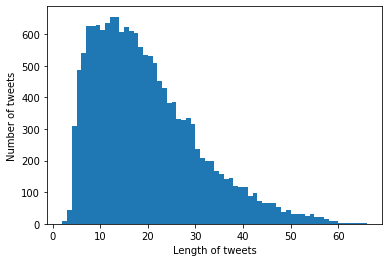

In [ ]:
length = [len(t.split(' ')) for t in tweets]
plt.hist(length, bins = len(set(length)))
plt.xlabel("Length of tweets")
plt.ylabel("Number of tweets")
plt.show()

In [ ]:
maxlen = 50
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
def get_sequences(tokenizer, tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded = pad_sequences(sequences, truncating = 'post', padding='post', maxlen = maxlen)
  return padded

In [ ]:
padded_train_seq = get_sequences(tokenizer, tweets)

In [ ]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

## Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [ ]:
classes = set(labels)
print(classes)

{'sadness', 'joy', 'love', 'surprise', 'anger', 'fear'}


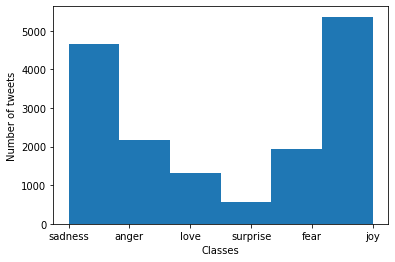

In [ ]:
plt.hist(labels, bins = 6)
plt.xlabel('Classes')
plt.ylabel('Number of tweets')
plt.show()

In [ ]:
class_to_index = dict((c,i) for i , c in enumerate(classes))
class_to_index

{'anger': 4, 'fear': 5, 'joy': 1, 'love': 2, 'sadness': 0, 'surprise': 3}

In [ ]:
index_to_class = dict((k,v) for v,k in class_to_index.items())
index_to_class

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'surprise', 4: 'anger', 5: 'fear'}

In [ ]:
names_to_ids = lambda labels: np.array([class_to_index.get(x) for x in labels])

In [ ]:
names_to_ids(labels)

array([0, 0, 4, ..., 1, 4, 0])

In [ ]:
train_labels = names_to_ids(labels)
len(train_labels)

16000

## Creating the Model

1. Creating the model
2. Compiling the model

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Embedding(10000,16,input_length = maxlen),     
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences = True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)), 
        tf.keras.layers.Dense(6, activation = 'softmax')
])

model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


## Training the Model

1. Preparing a validation set
2. Training the model

In [ ]:
val_tweets , val_labels = get_tweet(val)
val_seq = get_sequences(tokenizer, val_tweets)
val_labels = names_to_ids(val_labels)

In [ ]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [66]:
h = model.fit(
    padded_train_seq, train_labels, 
    validation_data = (val_seq, val_labels),
    epochs = 20,
    callbacks = [tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience =2)]
)

Epoch 1/20
500/500 [==============================] - 32s 53ms/step - loss: 1.2588 - accuracy: 0.4841 - val_loss: 0.7382 - val_accuracy: 0.7190
Epoch 2/20
500/500 [==============================] - 25s 49ms/step - loss: 0.5332 - accuracy: 0.7999 - val_loss: 0.5358 - val_accuracy: 0.8150
Epoch 3/20
500/500 [==============================] - 24s 49ms/step - loss: 0.3087 - accuracy: 0.9045 - val_loss: 0.4697 - val_accuracy: 0.8610
Epoch 4/20
500/500 [==============================] - 25s 49ms/step - loss: 0.1902 - accuracy: 0.9418 - val_loss: 0.3908 - val_accuracy: 0.8810
Epoch 5/20
500/500 [==============================] - 25s 50ms/step - loss: 0.1433 - accuracy: 0.9578 - val_loss: 0.3994 - val_accuracy: 0.8815
Epoch 6/20
500/500 [==============================] - 25s 51ms/step - loss: 0.1097 - accuracy: 0.9673 - val_loss: 0.4817 - val_accuracy: 0.8710
Epoch 7/20
500/500 [==============================] - 25s 50ms/step - loss: 0.0897 - accuracy: 0.9739 - val_loss: 0.4082 - val_accuracy:

## Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

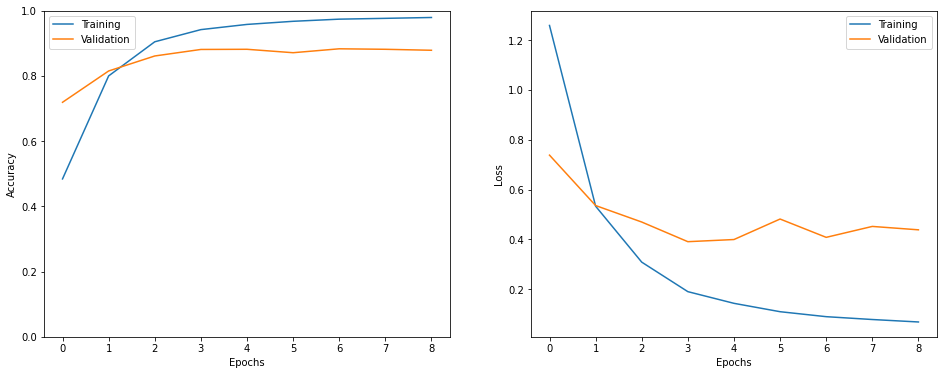

In [67]:
show_history(h)

In [68]:
test_tweets, test_labels = get_tweet(test)
test_seq = get_sequences(tokenizer, test_tweets)
test_labels = names_to_ids(test_labels)

In [69]:
_ = model.evaluate(test_seq , test_labels)

63/63 [==============================] - 1s 14ms/step - loss: 0.4212 - accuracy: 0.8775


In [74]:
i = random.randint(0, len(test_labels) - 1)
print('Sentence:', test_tweets[i])
print('Emotion:', index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_seq[i], axis = 0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]

print('Predicted Emotion:', pred_class)

Sentence: i feel thrilled that by the end of the month this round will be completed and i can begin to recover
Emotion: joy
Predicted Emotion: joy


In [77]:
pred = np.argmax(model.predict(test_seq), axis= -1)

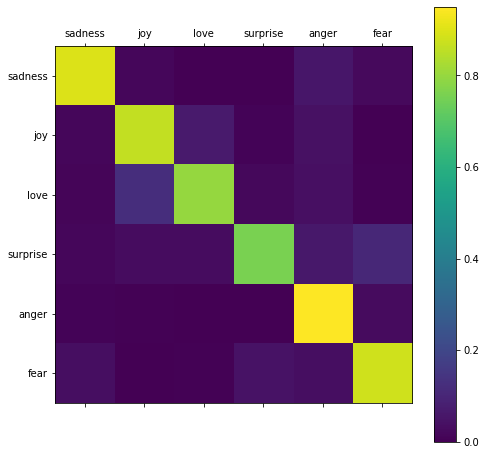

In [79]:
show_confusion_matrix(test_labels, pred, list(classes))